In [2]:
# STEP 1: Upload the CSV file manually
from google.colab import files
uploaded = files.upload()


Saving listings.csv to listings.csv


1- UNIVARIATE ANALYSIS FOR Statistical checks & EDA

Top 10 highest prices:
3189    60000.0
3615    19639.0
2974    10000.0
323      5000.0
1717     3000.0
390      2650.0
817      2600.0
3102     2500.0
3581     2143.0
2209     1729.0
Name: price_clean, dtype: float64


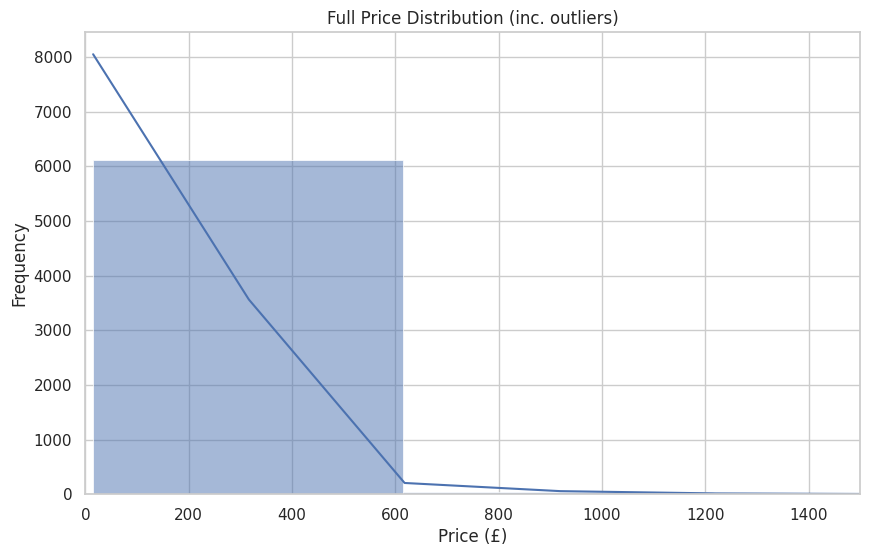


Review score distribution summary:
count    5079.000000
mean        4.688309
std         0.489099
min         1.000000
25%         4.610000
50%         4.830000
75%         5.000000
max         5.000000
Name: review_scores_rating, dtype: float64


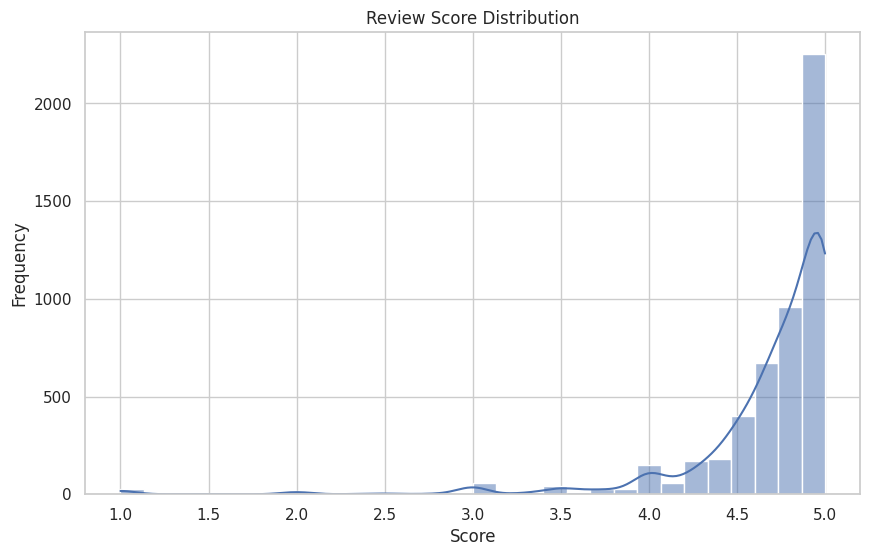


Top 15 Property Types:
property_type
Entire rental unit                   1840
Private room in home                 1356
Entire home                          1328
Entire condo                          521
Private room in rental unit           324
Entire serviced apartment             121
Private room in condo                 115
Private room in townhouse             114
Entire townhouse                       83
Private room in bed and breakfast      71
Entire cottage                         59
Room in hotel                          47
Entire guesthouse                      31
Entire guest suite                     30
Shared room in home                    26
Name: count, dtype: int64


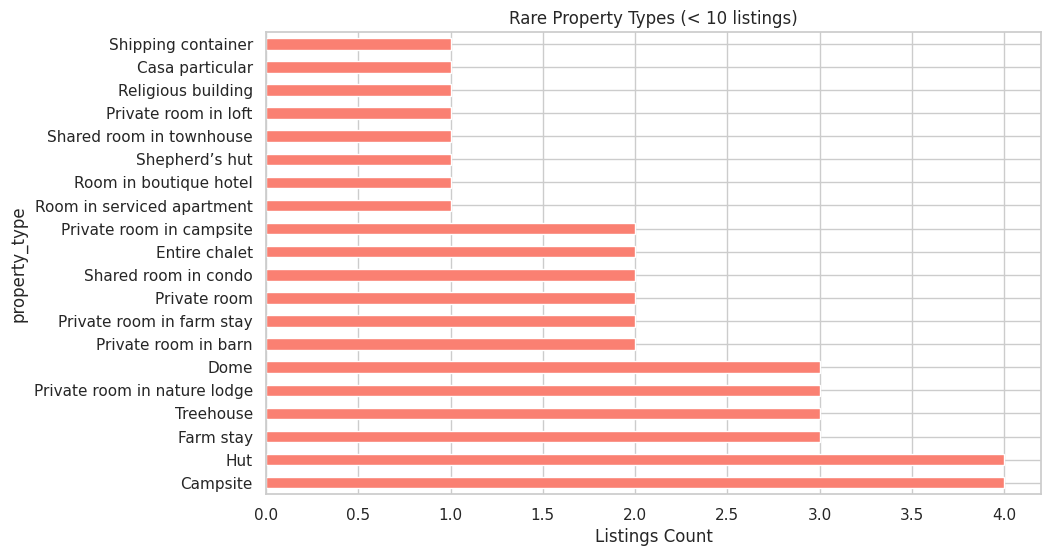

In [18]:
# --- UNIVARIATE ANALYSIS FOR Statistical checks & EDA ---

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# 1. Check extreme outliers in price
print("Top 10 highest prices:")
print(df['price_clean'].sort_values(ascending=False).head(10))

# Justify axis capping in dashboard (e.g., £1000 max)
sns.histplot(df['price_clean'], bins=100, kde=True)
plt.title("Full Price Distribution (inc. outliers)")
plt.xlabel("Price (£)")
plt.ylabel("Frequency")
plt.xlim(0, 1500)  # show extreme tail
plt.show()

# 2. Check review score spread to justify colour gradient or banding
print("\nReview score distribution summary:")
print(df['review_scores_rating'].describe())

sns.histplot(df['review_scores_rating'], bins=30, kde=True)
plt.title("Review Score Distribution")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.show()

# 3. Explore rare or overly granular property types (to justify grouping/simplification)
print("\nTop 15 Property Types:")
print(df['property_type'].value_counts().head(15))

# Optional: Plot if you need to justify removing low-frequency types
rare_types = df['property_type'].value_counts().tail(20)
rare_types.plot(kind='barh', title="Rare Property Types (< 10 listings)", color='salmon')
plt.xlabel("Listings Count")
plt.show()


2- BIVARIATE ANALYSIS FOR Statistical checks & EDA

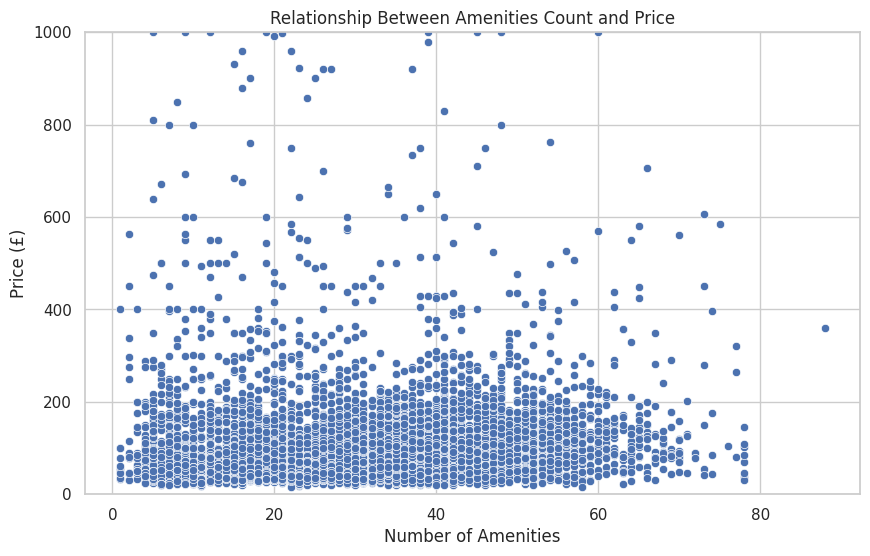

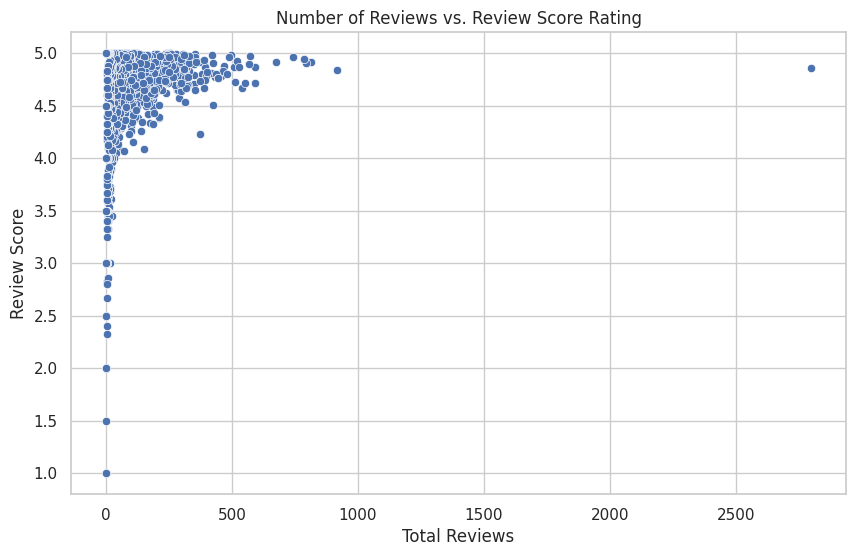

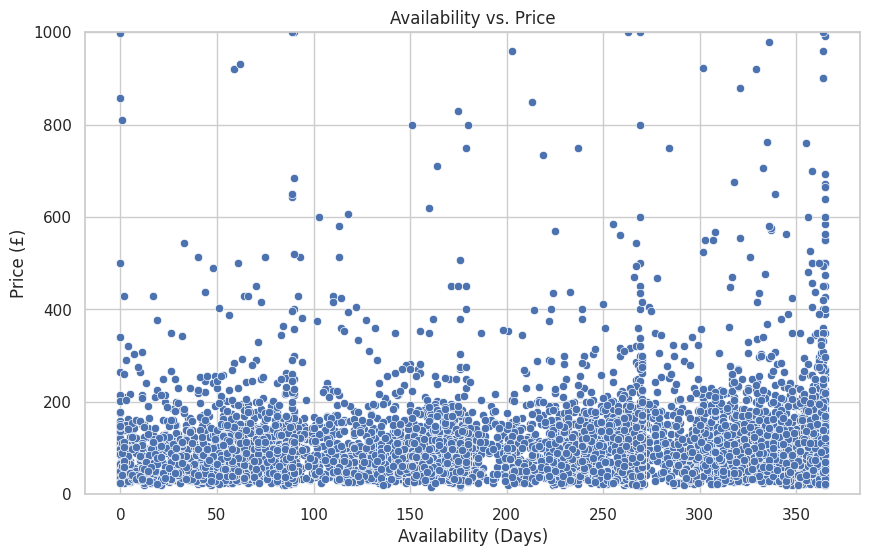

In [19]:
# --- BIVARIATE ANALYSIS FOR Statistical checks & EDA ---

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# 1. Check whether amenities might explain pricing variation
df['amenities_count'] = df['amenities'].apply(lambda x: len(x.strip('{}').split(',')) if pd.notnull(x) else 0)

sns.scatterplot(data=df, x='amenities_count', y='price_clean')
plt.title("Relationship Between Amenities Count and Price")
plt.xlabel("Number of Amenities")
plt.ylabel("Price (£)")
plt.ylim(0, 1000)
plt.show()

# 2. Explore if listings with more reviews tend to have higher ratings
sns.scatterplot(data=df, x='number_of_reviews', y='review_scores_rating')
plt.title("Number of Reviews vs. Review Score Rating")
plt.xlabel("Total Reviews")
plt.ylabel("Review Score")
plt.show()

# 3. Check if availability is related to pricing logic
sns.scatterplot(data=df, x='availability_365', y='price_clean')
plt.title("Availability vs. Price")
plt.xlabel("Availability (Days)")
plt.ylabel("Price (£)")
plt.ylim(0, 1000)
plt.show()


3- CORRELATION ANALYSIS FOR Statistical checks & EDA

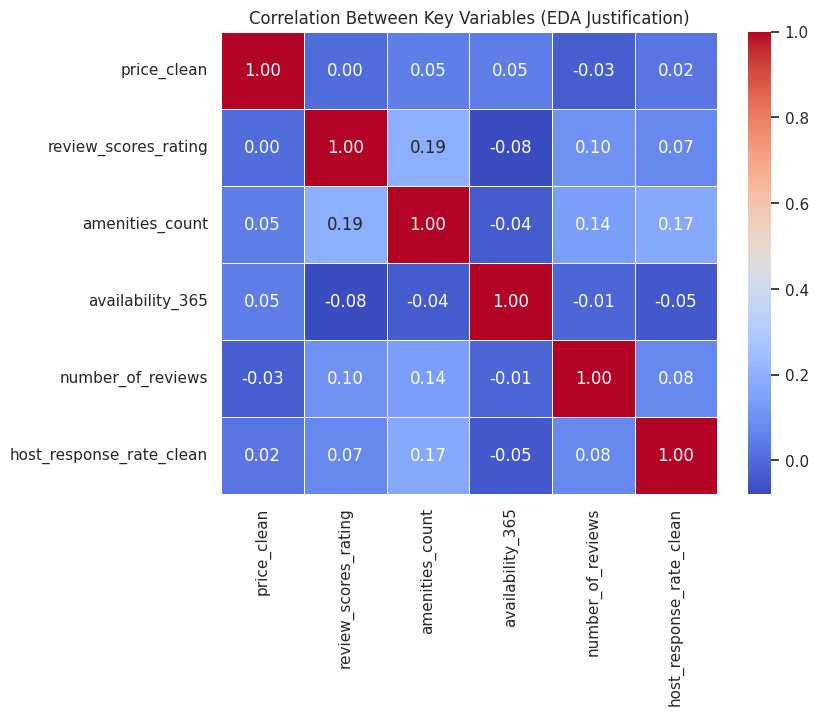

In [21]:
# --- CORRELATION ANALYSIS FOR Statistical checks & EDA ---

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (8, 6)

# Prepare key numerical variables only used for background logic
# Exclude ones already visualised together (e.g. no need for price vs room_type here)
corr_vars = [
    'price_clean',
    'review_scores_rating',
    'amenities_count',
    'availability_365',
    'number_of_reviews',
    'host_response_rate_clean',
]

# Ensure response rate is numeric (if not already)
if df['host_response_rate'].dtype == 'object':
    df['host_response_rate_clean'] = df['host_response_rate'].str.replace('%', '').astype(float)

# Drop rows with any missing values in selected variables
corr_df = df[corr_vars].dropna()

# Compute correlation matrix
corr_matrix = corr_df.corr(method='pearson')

# Plot heatmap (justification tool, not a dashboard visual)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Between Key Variables (EDA Justification)")
plt.show()
